In [1690]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1691]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [1692]:
# Reading leads.csv file
leads = pd.read_csv("leads.csv")

## Importing and understanding the data

In [1693]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1694]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1695]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1696]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1697]:
leads.shape

(9240, 37)

## Data Preparation

In [1698]:
# Removing columns Prospect ID and Lead Number
leads = leads.drop(["Prospect ID", "Lead Number"], axis = 1)

In [1699]:
# There are a lot of columns for which almost all/all rows have same value.
#These columns can be dropped as they doesn't add any value to the model
col_drop = ["What matters most to you in choosing a course","Search", "Magazine", "Newspaper Article","X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "Do Not Call"]
leads = leads.drop(col_drop, axis =1)
leads.shape

(9240, 22)

### Dealing with null values

In [1700]:
# Replacing "Select" with null values as these are actually null values
leads = leads.replace('Select', np.NaN)

In [1701]:
# Removing columns "Country", "How did you hear about X Education", "Tags", "Lead Profile", "City"
# as these columns have high number of null values and are not important from the model point of view
leads = leads.drop(["Country", "How did you hear about X Education", "Tags", "Lead Profile", "City", "Asymmetrique Activity Score", "Asymmetrique Profile Score"], axis = 1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Lead Quality                            4473 non-null   obje

In [1702]:
# "Lead Source", "TotalVisits", "Page Views Per Visit" and "Last Activity" columns have very few records with null values
# These records/rows can be dropped
col = ["Lead Source", "TotalVisits", "Page Views Per Visit" , "Last Activity"]
leads = leads[~leads[col].isna().any(axis=1)]

In [1703]:
# Replacing null values with the value "Data Not Available" as for columns like "Specialization", "What your current occupation"
# these columns might add information to the model.
leads = leads.replace(np.NaN, "Data Not Available")
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Lead Quality                            9074 non-null   obje

### Reducing the number of categories/levels in categorical columns

In [1704]:
# "Lead Origin" column
leads["Lead Origin"] = leads["Lead Origin"].replace(["Lead Add Form", "Lead Import"], "Others")
leads["Lead Origin"].value_counts()

Landing Page Submission    4885
API                        3578
Others                      611
Name: Lead Origin, dtype: int64

In [1705]:
# "Lead Source" column
series = pd.value_counts(leads["Lead Source"])
mask = (series/series.sum() * 100).lt(5) 
leads["Lead Source"] = np.where(leads["Lead Source"].isin(series[mask].index),'Other',leads["Lead Source"])
leads["Lead Source"].value_counts()

Google            2868
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Other              756
Name: Lead Source, dtype: int64

In [1706]:
# "Last Activity" column
series = pd.value_counts(leads["Last Activity"])
mask = (series/series.sum() * 100).lt(1) 
leads["Last Activity"] = np.where(leads["Last Activity"].isin(series[mask].index),'Other',leads["Last Activity"])
leads["Last Activity"].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Other                         191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [1707]:
# "Specialization" column
series = pd.value_counts(leads["Specialization"])
mask = (series/series.sum() * 100).lt(5) 
leads["Specialization"] = np.where(leads["Specialization"].isin(series[mask].index),'Other',leads["Specialization"])
leads["Specialization"].value_counts()

Data Not Available           3282
Other                        2674
Finance Management            959
Human Resource Management     837
Marketing Management          823
Operations Management         499
Name: Specialization, dtype: int64

In [1708]:
# "What is your current occupation" column
leads.rename(columns = {"What is your current occupation": "Occupation"}, inplace = True)
series = pd.value_counts(leads["Occupation"])
mask = (series/series.sum() * 100).lt(5) 
leads["Occupation"] = np.where(leads["Occupation"].isin(series[mask].index),'Student/Others',leads["Occupation"])
leads["Occupation"].value_counts()

Unemployed              5476
Data Not Available      2683
Working Professional     677
Student/Others           238
Name: Occupation, dtype: int64

In [1709]:
# "Last Notable Activity" column
series = pd.value_counts(leads["Last Notable Activity"])
mask = (series/series.sum() * 100).lt(5) 
leads["Last Notable Activity"] = np.where(leads["Last Notable Activity"].isin(series[mask].index),'Others',leads["Last Notable Activity"])
leads["Last Notable Activity"].value_counts()

Modified        3267
Email Opened    2823
SMS Sent        2152
Others           832
Name: Last Notable Activity, dtype: int64

In [1710]:
# Renaming the "A free copy of Mastering The Interview" column
leads.rename(columns = {"A free copy of Mastering The Interview": "Free_Copy"}, inplace = True)

### Converting boolean columns into numeric columns i.e. in 0,1 form

In [1711]:
col_bool = ['Do Not Email',"Free_Copy"]
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads[col_bool] = leads[col_bool].apply(binary_map)

### Dummy variable creation for categorical variables

In [1712]:
col_cat = ["Lead Origin", 'Lead Source',"Last Activity", "Specialization", "Occupation", "Lead Quality","Asymmetrique Activity Index", "Asymmetrique Profile Index", "Last Notable Activity"]
dummy_var = pd.get_dummies(leads[col_cat], drop_first= True)
leads = pd.concat([leads, dummy_var], axis = 1)
leads = leads.drop(col_cat, axis = 1)

### Outlier Analysis

<AxesSubplot:>

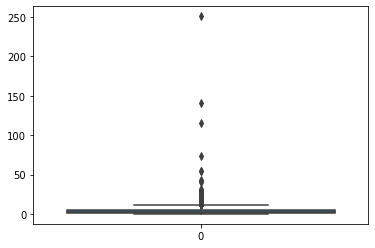

In [1713]:
# "TotalVisits" column
sns.boxplot(data = leads["TotalVisits"])
# TotalVisits greater than 40 are outliers and can be removed from the dataset

In [1714]:
# Removing records with column "TotalVisits" being greater than 40
leads = leads[leads["TotalVisits"] <= 40]

<AxesSubplot:xlabel='TotalVisits'>

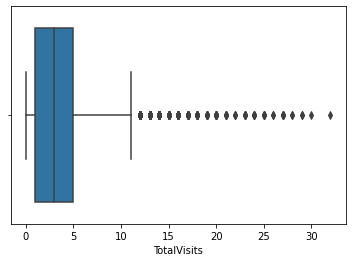

In [1715]:
# Plotting boxplot of "TotalVisits" column after removing the outliers
sns.boxplot(leads["TotalVisits"])

<AxesSubplot:xlabel='Total Time Spent on Website'>

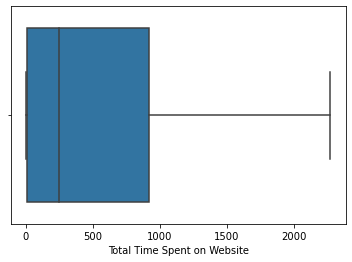

In [1716]:
# Total Time Spent on Website column
sns.boxplot(leads["Total Time Spent on Website"])

<AxesSubplot:xlabel='Page Views Per Visit'>

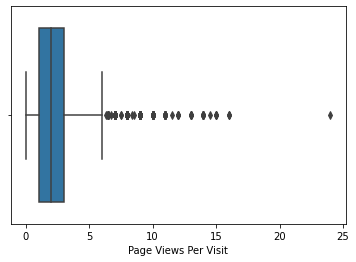

In [1717]:
# "Page Views Per Visit" column
sns.boxplot(leads["Page Views Per Visit"])
# There is one outlier with value greater than 20

In [1718]:
# Removing the outlier
leads = leads[leads["Page Views Per Visit"] < 20]

<AxesSubplot:xlabel='Page Views Per Visit'>

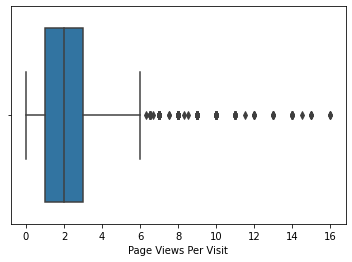

In [1719]:
# Plotting the boxplot after removing the outlier
sns.boxplot(leads["Page Views Per Visit"])

### Train-test split of data

In [1720]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
# Putting response variable to y
y = leads["Converted"]

In [1721]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling on train data

In [1722]:
scaler = StandardScaler()
col_scale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[col_scale] = scaler.fit_transform(X_train[col_scale])
X_train[col_scale].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.344000e+03,6.344000e+03,6.344000e+03
mean,1.525682e-16,-3.081814e-17,-9.562198e-17
std,1.000079e+00,1.000079e+00,1.000079e+00
min,-9.810963e-01,-8.777663e-01,-1.134477e+00
25%,-6.888450e-01,-8.634330e-01,-6.526249e-01
50%,-1.043425e-01,-4.338955e-01,-1.707733e-01
75%,4.801600e-01,7.761147e-01,3.110784e-01
max,8.370944e+00,3.324210e+00,6.575150e+00


## Model Building

####  Creating a function which will take the columns (dependent variables) as input and will provide the model as output


In [1723]:
def log_model(col):
    X_train_sm = sm.add_constant(X_train[col])
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    return res

####  Creating a function that will plot lead conversion rate, sensitivity and accuracy of our model


In [1724]:
def plot_curve(res, col):
    # Calculating probabilities of target variable as predicted by model
    X_train_sm = sm.add_constant(X_train[col])
    y_train_pred = res.predict(X_train_sm).values.reshape(-1) 
    
    #Creating a dataframe with the actual converted flag and the predicted probabilities
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
    
    #Creating a dataframe with probability plot lead conversion rate, sensitivity and accuracy
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','lead_conv_rate'])
    
    # Let's create columns with different probability cutoffs
    # Also let's calculate lead conversion rate, sensitivity and accuracy for various probability cutoffs.
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
        cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        lead_conv_rate = cm1[1,1]/(cm1[0,1]+cm1[1,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,lead_conv_rate]
        # Let's plot accuracy sensitivity and lead conversion rate for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','lead_conv_rate'])
    return y_train_pred_final, cutoff_df
    plt.show()

####  Creating a function to create ROC curve to check for model efficiency


In [1725]:
def draw_roc( y_train_pred_final ):
    fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"],
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"] )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

####  Defining function to select columns using RFE


In [1726]:
def log_rfe(n): # n is the number of columns on which rfe is to be run
    logreg = LogisticRegression()
    rfe = RFE(logreg, n_features_to_select= n)  
    rfe = rfe.fit(X_train, y_train)
    col_RFE = X_train.columns[rfe.support_]
    return col_RFE

In [1778]:
log_rfe(8)

Index(['Lead Origin_Others', 'Occupation_Working Professional',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### Creating model with all the columns

In [1727]:
res = log_model(X_train.columns) # Passing all columns to the function
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2137.6
Date:                Tue, 22 Nov 2022   Deviance:                       4275.3
Time:                        20:36:07   Pearson chi2:                 6.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4788
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.1181      0.356     -5.952      0.000      -2.816      -1.421
Do Not Email                                      -1.0465      0.229     -4.563      0.000      -1.496      -0.597
TotalVisits                                        0.2133      0.055      3.907      0.000       0.106       0.320
Total Time Spent on Website                        1.0327      0.046     22.628      0.000       0.943       1.122
Page Views Per Visit                              -0.2404      0.062     -3.865      0.000      -0.362      -0.118
Free_Copy                                         -0.0528      0.126     -0.418      0.676      -0.300       0.195
Lead Origin_Landing Page Submission               -0.5020      0.167     -3.012      0.003      -0.829      -0.175
Lead Origin_Others                                 2.8597      0.414      6.902      0.000       2.048       3.672
Lead Source_Google                                 0.2800      0.132      2.121      0.034       0.021       0.539
Lead Source_Olark Chat                             1.1556      0.184      6.295      0.000       0.796       1.515
Lead Source_Organic Search                         0.0937      0.150      0.625      0.532      -0.200       0.387
Lead Source_Other                                 -0.1326      0.367     -0.361      0.718      -0.852       0.587
Last Activity_Email Bounced                        0.2710      0.482      0.562      0.574      -0.674       1.216
Last Activity_Email Link Clicked                   0.1429      0.364      0.393      0.695      -0.570       0.856
Last Activity_Email Opened                         0.7790      0.268      2.904      0.004       0.253       1.305
Last Activity_Form Submitted on Website            0.8559      0.421      2.035      0.042       0.032       1.680
Last Activity_Olark Chat Conversation             -0.5866      0.288     -2.038      0.042      -1.151      -0.022
Last Activity_Other                                0.9694      0.365      2.655      0.008       0.254       1.685
Last Activity_Page Visited on Website              0.0895      0.308      0.291      0.771      -0.514       0.693
Last Activity_SMS Sent                             1.3983      0.268      5.223      0.000       0.874       1.923
Specialization_Finance Management                  0.1844      0.192      0.961      0.336      -0.192       0.561
Specialization_Human Resource Management           0.1578      0.193      0.816      0.415      -0.221       0.537
Specialization_Marketing Management                0.3253      0.193      1.688      0.091      -0.052       0.703
Specialization_Operations Management               0.3115      0.221      1.411      0.158   

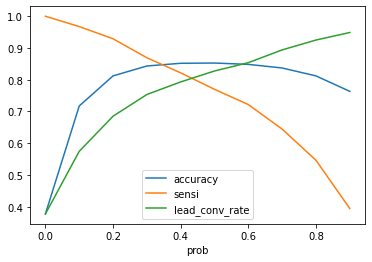

In [1728]:
# Plotting accuracy, sensitivity and lead conversion rate when all columns are included
y_train_pred_final, cutoff_df = plot_curve(res, X_train.columns)


In [1729]:
cutoff_df
# Lead conversion rate is around 82% (Greater than 80%) for cut-off probability being 0.5

,prob,accuracy,sensi,lead_conv_rate
0.0,0.0,0.377364,1.000000,0.377364
0.1,0.1,0.717371,0.967419,0.574547
0.2,0.2,0.812106,0.928989,0.685151
0.3,0.3,0.843317,0.869256,0.753440
0.4,0.4,0.851828,0.821637,0.793145
0.5,0.5,0.852617,0.769841,0.827571
0.6,0.6,0.848361,0.721805,0.853755
0.7,0.7,0.837011,0.644528,0.893975
0.8,0.8,0.812106,0.546366,0.925035
0.9,0.9,0.763398,0.394319,0.948744


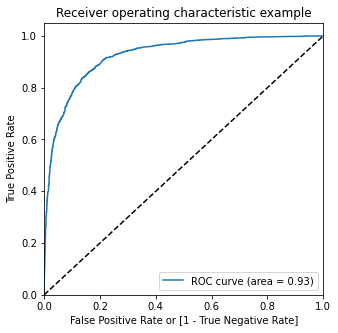

In [1730]:
# Drawing ROC curve to check for model efficiency
draw_roc(y_train_pred_final)
# ROC curve having area of 0.93 shows that model is efficient

### Creating model with column selection using RFE

#### RFE value being 5

In [1731]:
col_RFE = log_rfe(5) # Passing number of columns equalling 5 to log_rfe function getting 5 columns
res = log_model(col_RFE) # Passing the 5 columns received from log_rfe function to log_model funciton to get the model
res.summary()
# All the 5 columns including constant has P value almost equalling zero

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2932.1
Date:                Tue, 22 Nov 2022   Deviance:                       5864.1
Time:                        20:36:09   Pearson chi2:                 6.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3305
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.3714      0.039    -34.750      0.000      -1.449      -1.294
Lead Origin_Others                 2.3533      0.179     13.163      0.000       2.003       2.704
Lead Quality_High in Relevance     3.6983      0.201     18.359      0.000       3.303       4.093
Lead Quality_Low in Relevance      2.6912      0.140     19.251      0.000       2.417       2.965
Lead Quality_Might be              2.3570      0.083     28.433      0.000       2.195       2.520
Lead Quality_Worst                -2.5964      0.360     -7.221      0.000      -3.301      -1.892
==================================================================================================
"""

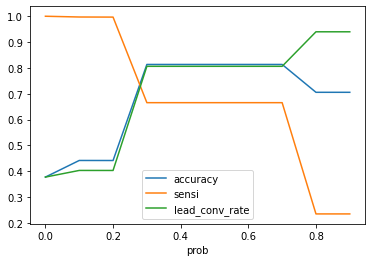

In [1732]:
y_train_pred_final, cutoff_df = plot_curve(res, col_RFE) # Plotting the metrics 

In [1733]:
cutoff_df
# Sensitivity is low when lead conversion rate is more than 80%. Need to try ROC value equalling 10

,prob,accuracy,sensi,lead_conv_rate
0.0,0.0,0.377364,1.000000,0.377364
0.1,0.1,0.441677,0.997076,0.403073
0.2,0.2,0.441520,0.996658,0.402972
0.3,0.3,0.813367,0.665414,0.806174
0.4,0.4,0.813367,0.665414,0.806174
0.5,0.5,0.813367,0.665414,0.806174
0.6,0.6,0.813367,0.665414,0.806174
0.7,0.7,0.813367,0.665414,0.806174
0.8,0.8,0.705549,0.234754,0.939799
0.9,0.9,0.705549,0.234754,0.939799


#### RFE value being 10

In [1734]:
col_RFE = log_rfe(10) # Passing number of columns equalling 10 to log_rfe function getting 10 columns
res = log_model(col_RFE) # Passing the 10 columns received from log_rfe function to log_model funciton to get the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.1
Date:                Tue, 22 Nov 2022   Deviance:                       5174.2
Time:                        20:36:11   Pearson chi2:                 7.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3995
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.6807      0.055    -30.669      0.000      -1.788      -1.573
Do Not Email                          -1.1715      0.169     -6.945      0.000      -1.502      -0.841
Lead Origin_Others                     2.1990      0.190     11.558      0.000       1.826       2.572
Lead Source_Olark Chat                 0.0077      0.089      0.087      0.931      -0.167       0.182
Occupation_Working Professional        1.7007      0.200      8.522      0.000       1.310       2.092
Lead Quality_High in Relevance         3.7408      0.210     17.791      0.000       3.329       4.153
Lead Quality_Low in Relevance          2.8197      0.151     18.695      0.000       2.524       3.115
Lead Quality_Might be                  1.8050      0.095     19.029      0.000       1.619       1.991
Lead Quality_Worst                    -2.2540      0.362     -6.226      0.000      -2.964      -1.544
Asymmetrique Activity Index_03.Low    -1.7951      0.263     -6.820      0.000      -2.311      -1.279
Last Notable Activity_SMS Sent         1.6396      0.080     20.580      0.000       1.483       1.796
======================================================================================================
"""

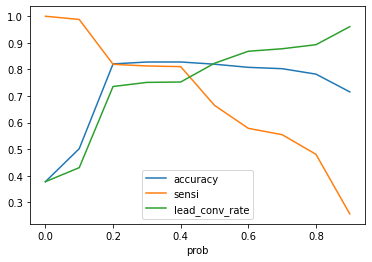

In [1735]:
y_train_pred_final, cutoff_df = plot_curve(res, col_RFE) # Plotting the metrics 

In [1736]:
cutoff_df
# Sensitivity is low when lead conversion rate is more than 80%. Need to try ROC value equalling 15

,prob,accuracy,sensi,lead_conv_rate
0.0,0.0,0.377364,1.000000,0.377364
0.1,0.1,0.501576,0.987886,0.430156
0.2,0.2,0.820618,0.819131,0.735559
0.3,0.3,0.827711,0.812865,0.751061
0.4,0.4,0.827869,0.810359,0.752521
0.5,0.5,0.819515,0.664578,0.823073
0.6,0.6,0.807692,0.578112,0.868256
0.7,0.7,0.802648,0.554302,0.877646
0.8,0.8,0.782156,0.480368,0.892857
0.9,0.9,0.715322,0.256057,0.960815


#### RFE value being 15

In [1737]:
col_RFE = log_rfe(15) # Passing number of columns equalling 15 to log_rfe function getting 15 columns
res = log_model(col_RFE) # Passing the 15 columns received from log_rfe function to log_model funciton to get the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2227.5
Date:                Tue, 22 Nov 2022   Deviance:                       4455.1
Time:                        20:36:12   Pearson chi2:                 7.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4638
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.6982      0.105    -25.759      0.000      -2.903      -2.493
Do Not Email                               -0.8930      0.194     -4.601      0.000      -1.273      -0.513
Total Time Spent on Website                 1.0448      0.044     23.491      0.000       0.958       1.132
Lead Origin_Others                          3.2607      0.199     16.406      0.000       2.871       3.650
Lead Source_Olark Chat                      1.3225      0.111     11.924      0.000       1.105       1.540
Last Activity_Email Opened                  0.8275      0.108      7.658      0.000       0.616       1.039
Last Activity_Form Submitted on Website     0.6882      0.363      1.896      0.058      -0.023       1.400
Last Activity_Other                         0.9913      0.275      3.610      0.000       0.453       1.529
Last Activity_SMS Sent                      1.0514      0.166      6.337      0.000       0.726       1.377
Occupation_Working Professional             1.7212      0.214      8.026      0.000       1.301       2.142
Lead Quality_High in Relevance              3.5452      0.221     16.068      0.000       3.113       3.978
Lead Quality_Low in Relevance               2.6142      0.163     16.016      0.000       2.294       2.934
Lead Quality_Might be                       1.7278      0.104     16.555      0.000       1.523       1.932
Lead Quality_Worst                         -2.0667      0.380     -5.442      0.000      -2.811      -1.322
Asymmetrique Activity Index_03.Low         -1.7526      0.279     -6.288      0.000      -2.299      -1.206
Last Notable Activity_SMS Sent              1.1973      0.156      7.688      0.000       0.892       1.503
===========================================================================================================
"""

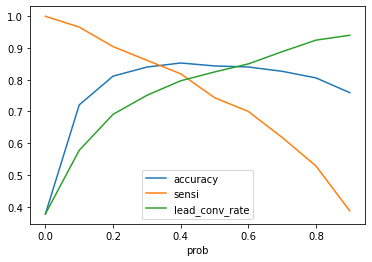

In [1738]:
y_train_pred_final, cutoff_df = plot_curve(res, col_RFE) # Plotting the metrics 

In [1739]:
cutoff_df
# Sensitivity and accuracy is ok when lead conversion rate is more than 80%. Need to try ROC value equalling 20

,prob,accuracy,sensi,lead_conv_rate
0.0,0.0,0.377364,1.000000,0.377364
0.1,0.1,0.720839,0.965748,0.577856
0.2,0.2,0.811318,0.904344,0.691031
0.3,0.3,0.839849,0.861320,0.750910
0.4,0.4,0.852774,0.818713,0.796748
0.5,0.5,0.843474,0.743525,0.824456
0.6,0.6,0.840164,0.700084,0.849899
0.7,0.7,0.826608,0.618212,0.888355
0.8,0.8,0.805801,0.528404,0.924708
0.9,0.9,0.759300,0.386800,0.940102


#### RFE value being 20

In [1740]:
col_RFE = log_rfe(20) # Passing number of columns equalling 20 to log_rfe function getting 20 columns
res = log_model(col_RFE) # Passing the 20 columns received from log_rfe function to log_model funciton to get the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2179.5
Date:                Tue, 22 Nov 2022   Deviance:                       4358.9
Time:                        20:36:14   Pearson chi2:                 6.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4719
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -3.1467      0.158    -19.857      0.000      -3.457      -2.836
Do Not Email                               -1.0800      0.199     -5.418      0.000      -1.471      -0.689
Total Time Spent on Website                 1.0421      0.045     23.216      0.000       0.954       1.130
Lead Origin_Others                          2.9472      0.199     14.774      0.000       2.556       3.338
Lead Source_Olark Chat                      1.3958      0.116     11.983      0.000       1.167       1.624
Last Activity_Email Opened                  0.8650      0.150      5.748      0.000       0.570       1.160
Last Activity_Form Submitted on Website     0.7236      0.377      1.920      0.055      -0.015       1.462
Last Activity_Olark Chat Conversation      -0.4849      0.204     -2.376      0.017      -0.885      -0.085
Last Activity_Other                         0.7859      0.288      2.731      0.006       0.222       1.350
Last Activity_SMS Sent                      1.2632      0.199      6.359      0.000       0.874       1.653
Occupation_Student/Others                   1.0727      0.298      3.595      0.000       0.488       1.658
Occupation_Unemployed                       0.8308      0.106      7.854      0.000       0.623       1.038
Occupation_Working Professional             2.4836      0.234     10.592      0.000       2.024       2.943
Lead Quality_High in Relevance              3.0730      0.226     13.574      0.000       2.629       3.517
Lead Quality_Low in Relevance               2.1598      0.173     12.489      0.000       1.821       2.499
Lead Quality_Might be                       1.2751      0.119     10.732      0.000       1.042       1.508
Lead Quality_Not Sure                      -0.6115      0.130     -4.708      0.000      -0.866      -0.357
Lead Quality_Worst                         -2.5671      0.386     -6.654      0.000      -3.323      -1.811
Asymmetrique Activity Index_03.Low         -1.7653      0.277     -6.364      0.000      -2.309      -1.222
Last Notable Activity_Others                0.7646      0.178      4.299      0.000       0.416       1.113
Last Notable Activity_SMS Sent              1.0582      0.160      6.608      0.000       0.744       1.372
===========================================================================================================
"""

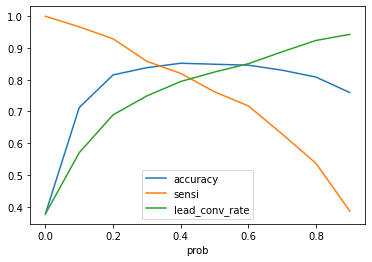

In [1741]:

y_train_pred_final, cutoff_df = plot_curve(res, col_RFE) # Plotting the metrics 

In [1742]:
cutoff_df
# Metrics doesn't improve much on increasing RFE columns from 15 to 20. 
#Will try keeping RFE as 15 and adjusting for p-values and VIF

,prob,accuracy,sensi,lead_conv_rate
0.0,0.0,0.377364,1.000000,0.377364
0.1,0.1,0.712484,0.966583,0.570232
0.2,0.2,0.815259,0.928989,0.689399
0.3,0.3,0.837957,0.857978,0.749088
0.4,0.4,0.851986,0.819967,0.794415
0.5,0.5,0.848834,0.761905,0.824221
0.6,0.6,0.845839,0.717627,0.850495
0.7,0.7,0.830076,0.629073,0.887972
0.8,0.8,0.808480,0.536759,0.923796
0.9,0.9,0.759615,0.386383,0.942915


#### RFE value being 15 and adjusting for p-values and VIF

In [1743]:
col_RFE = log_rfe(15) # Passing number of columns equalling 15 to log_rfe function getting 15 columns
res = log_model(col_RFE) # Passing the 15 columns received from log_rfe function to log_model funciton to get the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2227.5
Date:                Tue, 22 Nov 2022   Deviance:                       4455.1
Time:                        20:36:16   Pearson chi2:                 7.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4638
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.6982      0.105    -25.759      0.000      -2.903      -2.493
Do Not Email                               -0.8930      0.194     -4.601      0.000      -1.273      -0.513
Total Time Spent on Website                 1.0448      0.044     23.491      0.000       0.958       1.132
Lead Origin_Others                          3.2607      0.199     16.406      0.000       2.871       3.650
Lead Source_Olark Chat                      1.3225      0.111     11.924      0.000       1.105       1.540
Last Activity_Email Opened                  0.8275      0.108      7.658      0.000       0.616       1.039
Last Activity_Form Submitted on Website     0.6882      0.363      1.896      0.058      -0.023       1.400
Last Activity_Other                         0.9913      0.275      3.610      0.000       0.453       1.529
Last Activity_SMS Sent                      1.0514      0.166      6.337      0.000       0.726       1.377
Occupation_Working Professional             1.7212      0.214      8.026      0.000       1.301       2.142
Lead Quality_High in Relevance              3.5452      0.221     16.068      0.000       3.113       3.978
Lead Quality_Low in Relevance               2.6142      0.163     16.016      0.000       2.294       2.934
Lead Quality_Might be                       1.7278      0.104     16.555      0.000       1.523       1.932
Lead Quality_Worst                         -2.0667      0.380     -5.442      0.000      -2.811      -1.322
Asymmetrique Activity Index_03.Low         -1.7526      0.279     -6.288      0.000      -2.299      -1.206
Last Notable Activity_SMS Sent              1.1973      0.156      7.688      0.000       0.892       1.503
===========================================================================================================
"""

In [1744]:
# Last Activity_Form Submitted on Website has p-value greater than 5%. Dropping this columns and re-building model
col_RFE = list(col_RFE)
col_RFE.remove("Last Activity_Form Submitted on Website")

In [1745]:
res = log_model(col_RFE) # Passing the updated col_RFE to log_model funciton to get the model
res.summary()
# All has p-value equalling zero

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2229.2
Date:                Tue, 22 Nov 2022   Deviance:                       4458.4
Time:                        20:36:16   Pearson chi2:                 7.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4635
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -2.6576      0.102    -26.106      0.000      -2.857      -2.458
Do Not Email                          -0.9079      0.194     -4.691      0.000      -1.287      -0.529
Total Time Spent on Website            1.0454      0.044     23.508      0.000       0.958       1.133
Lead Origin_Others                     3.2598      0.199     16.408      0.000       2.870       3.649
Lead Source_Olark Chat                 1.3125      0.111     11.857      0.000       1.096       1.529
Last Activity_Email Opened             0.7892      0.106      7.473      0.000       0.582       0.996
Last Activity_Other                    0.9539      0.274      3.486      0.000       0.418       1.490
Last Activity_SMS Sent                 1.0130      0.164      6.165      0.000       0.691       1.335
Occupation_Working Professional        1.7228      0.214      8.039      0.000       1.303       2.143
Lead Quality_High in Relevance         3.5379      0.220     16.053      0.000       3.106       3.970
Lead Quality_Low in Relevance          2.6128      0.163     16.007      0.000       2.293       2.933
Lead Quality_Might be                  1.7278      0.104     16.558      0.000       1.523       1.932
Lead Quality_Worst                    -2.0711      0.380     -5.454      0.000      -2.815      -1.327
Asymmetrique Activity Index_03.Low    -1.7346      0.280     -6.201      0.000      -2.283      -1.186
Last Notable Activity_SMS Sent         1.1974      0.156      7.688      0.000       0.892       1.503
======================================================================================================
"""

In [1746]:
# Checking for VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col_RFE].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_RFE].values, i) for i in range(X_train[col_RFE].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Last Activity_SMS Sent has considerable (even though less than 5) VIF. It may be dropped and building again the model

,Features,VIF
6,Last Activity_SMS Sent,4.98
13,Last Notable Activity_SMS Sent,4.79
10,Lead Quality_Might be,1.62
1,Total Time Spent on Website,1.38
2,Lead Origin_Others,1.35
4,Last Activity_Email Opened,1.34
3,Lead Source_Olark Chat,1.33
7,Occupation_Working Professional,1.33
8,Lead Quality_High in Relevance,1.22
9,Lead Quality_Low in Relevance,1.20


In [1747]:
col_RFE.remove("Last Activity_SMS Sent") # Removing column "Last Activity_SMS Sent"

In [1748]:
res = log_model(col_RFE) # Passing the updated col_RFE to log_model funciton to get the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2247.7
Date:                Tue, 22 Nov 2022   Deviance:                       4495.5
Time:                        20:36:16   Pearson chi2:                 7.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4604
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -2.3934      0.088    -27.138      0.000      -2.566      -2.221
Do Not Email                          -0.9328      0.191     -4.877      0.000      -1.308      -0.558
Total Time Spent on Website            1.0481      0.044     23.662      0.000       0.961       1.135
Lead Origin_Others                     3.4201      0.201     16.988      0.000       3.025       3.815
Lead Source_Olark Chat                 1.2572      0.109     11.498      0.000       1.043       1.471
Last Activity_Email Opened             0.5318      0.094      5.647      0.000       0.347       0.716
Last Activity_Other                    0.6906      0.270      2.560      0.010       0.162       1.219
Occupation_Working Professional        1.7011      0.214      7.961      0.000       1.282       2.120
Lead Quality_High in Relevance         3.5326      0.221     15.982      0.000       3.099       3.966
Lead Quality_Low in Relevance          2.5670      0.163     15.797      0.000       2.249       2.886
Lead Quality_Might be                  1.7602      0.104     16.927      0.000       1.556       1.964
Lead Quality_Worst                    -2.1345      0.378     -5.640      0.000      -2.876      -1.393
Asymmetrique Activity Index_03.Low    -1.7479      0.279     -6.265      0.000      -2.295      -1.201
Last Notable Activity_SMS Sent         1.9441      0.103     18.941      0.000       1.743       2.145
======================================================================================================
"""

In [1749]:
# Checking for VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col_RFE].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_RFE].values, i) for i in range(X_train[col_RFE].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# All columns have considerably lower VIF

,Features,VIF
9,Lead Quality_Might be,1.60
12,Last Notable Activity_SMS Sent,1.40
1,Total Time Spent on Website,1.38
2,Lead Origin_Others,1.33
4,Last Activity_Email Opened,1.33
6,Occupation_Working Professional,1.33
3,Lead Source_Olark Chat,1.32
7,Lead Quality_High in Relevance,1.22
8,Lead Quality_Low in Relevance,1.20
0,Do Not Email,1.09


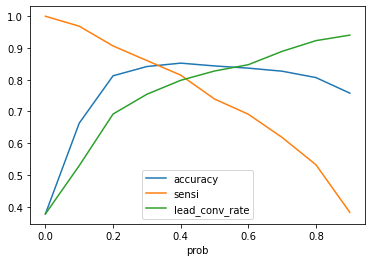

In [1750]:
y_train_pred_final, cutoff_df = plot_curve(res, col_RFE) # Plotting the metrics 

In [1751]:
cutoff_df
# Lead conversion rate is almost 80% for probability equalling 0.4 with sensitivity and accuracy also being pretty high
# Lead conversion rate is 82.75% for probability equalling 0.5 but there is huge drop in sensitivity value
# Will try to find optimum cutoff probability value between 0.4 and 0.5

,prob,accuracy,sensi,lead_conv_rate
0.0,0.0,0.377364,1.000000,0.377364
0.1,0.1,0.663304,0.968672,0.529452
0.2,0.2,0.812421,0.906433,0.691964
0.3,0.3,0.841583,0.860485,0.754302
0.4,0.4,0.852301,0.814536,0.798199
0.5,0.5,0.843474,0.739348,0.827489
0.6,0.6,0.836538,0.691312,0.847414
0.7,0.7,0.826923,0.618212,0.889423
0.8,0.8,0.806747,0.532164,0.923188
0.9,0.9,0.757881,0.382623,0.940452


#### Trying to find the optimum value of cut-off probability between 0.4 and 0.5

In [1752]:
# Calculating metrics for probability cutoff values of 0.41,0.42 and so on
numbers = [0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    lead_conv_rate = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,lead_conv_rate]
    

In [1753]:
# Looking at cutoff_df dataframe to choose optimum value of probability
cutoff_df
# Choosing probability value of 0.45 as it leads to lead_conversion_rate greater than 81% with all other metrics also being high

,prob,accuracy,sensi,lead_conv_rate
0.00,0.00,0.377364,1.000000,0.377364
0.10,0.10,0.663304,0.968672,0.529452
0.20,0.20,0.812421,0.906433,0.691964
0.30,0.30,0.841583,0.860485,0.754302
0.40,0.40,0.852301,0.814536,0.798199
0.50,0.50,0.843474,0.739348,0.827489
0.60,0.60,0.836538,0.691312,0.847414
0.70,0.70,0.826923,0.618212,0.889423
0.80,0.80,0.806747,0.532164,0.923188
0.90,0.90,0.757881,0.382623,0.940452


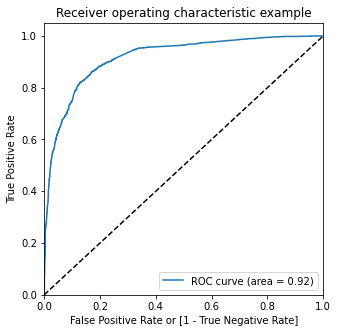

In [1754]:
# Drawing ROC to check for model efficiency
draw_roc(y_train_pred_final)
# ROC value equallong 0.92 shows that model is pretty efficient

In [1755]:
y_train_pred_final["Final_Predicted"] = y_train_pred_final[0.45] # Making column of final predicted y_train values

##### Calculating metrics for the model

In [1756]:
# Confusion Matrix of final model
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion

array([[3509,  441],
       [ 502, 1892]], dtype=int64)

In [1757]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1758]:
# Let's see the sensitivity/recall of our logistic regression model
TP / float(TP+FN)

0.7903091060985797

In [1759]:
# Let us calculate specificity
TN / float(TN+FP)

0.8883544303797468

In [1760]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.11164556962025317


In [1761]:
# Precision (Lead conversion Rate) 
print (TP / float(TP+FP))

0.810972996142306


In [1762]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8748441785091


### Making predictions on the test set

In [1763]:
# Feature scaling on the test set
X_test[col_scale] = scaler.transform(X_test[col_scale])
X_test[col_scale].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2720.000000,2720.000000,2720.000000
mean,0.009872,0.049683,0.008020
std,1.004751,1.026798,0.996927
min,-0.981096,-0.877766,-1.134477
25%,-0.688845,-0.839390,-0.652625
50%,-0.104343,-0.404304,-0.170773
75%,0.480160,0.903728,0.311078
max,7.494190,3.289071,5.852373


In [1764]:
# Calculating y_test probabilities based on "res" model
X_test_sm = sm.add_constant(X_test[col_RFE])
y_test_pred = res.predict(X_test_sm)

In [1765]:
# Converting y_test_pred to dataframe
y_test_pred = pd.DataFrame(y_test_pred)

In [1766]:
# Changing the name of column from 0 to "Converted_Prob" 
y_test_pred.rename(columns = {0:'Converted_Prob'}, inplace = True)

In [1767]:
# Making a column of actual values of y_test
y_test_pred["Converted"] = y_test.values

In [1768]:
# making column "Final_Predicted" based on cutoff probability of 0.45
y_test_pred['Final_Predicted'] = y_test_pred.Converted_Prob.map(lambda x: 1 if x > 0.45 else 0)

#### Calculating metrics on test data

In [1769]:
# Confusion Matrix on test data
confusion = metrics.confusion_matrix(y_test_pred.Converted, y_test_pred.Final_Predicted )
confusion

array([[1502,  179],
       [ 195,  844]], dtype=int64)

In [1770]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1771]:
print("Sensitivity is ", TP/(TP+FN))
print("Specificity is ", TN/(TN+FP))
print("Lead Conversion Rate is ", TP/(TP+FP))
print("Accuracy is ", (TP+TN)/(TP+TN+FP+FN))

Sensitivity is  0.8123195380173244
Specificity is  0.8935157644259369
Lead Conversion Rate is  0.8250244379276638
Accuracy is  0.8625


## All metrics are expected and in-line with metrics on train data